<a href="https://colab.research.google.com/github/phystopia/pyromat-thermodynamics/blob/main/sat_diagrams_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyromat
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt

pm.config["unit_pressure"] = "kPa"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.7 MB/s 
  Created wheel for pyromat: filename=PYroMat-2.2.4-py3-none-any.whl size=1009766 sha256=7be40a99a018e3a95978c4f15a6e71eda48259991ea886fbd8ad698759e92af6
  Stored in directory: /root/.cache/pip/wheels/80/78/c3/2de108a92ae9b163466ae3cebba2e1e53245550c1abcf62df7
Successfully built pyromat


## Data from multiphase-water

In [60]:
water = pm.get("mp.H2O")

## Saturation P-v Diagram for Water

### Defining the range of pressures, from the minimum to the critical pressure.

In [ ]:
p = np.arange(1.,22060.)

### Defining saturation specific volumes.

In [61]:
v = water.vs(p=p)
vf= v[0]
vg= v[1]

### Creating the log-log graph.

Text(0.5, 0, 'specific volume (m3/kg)')

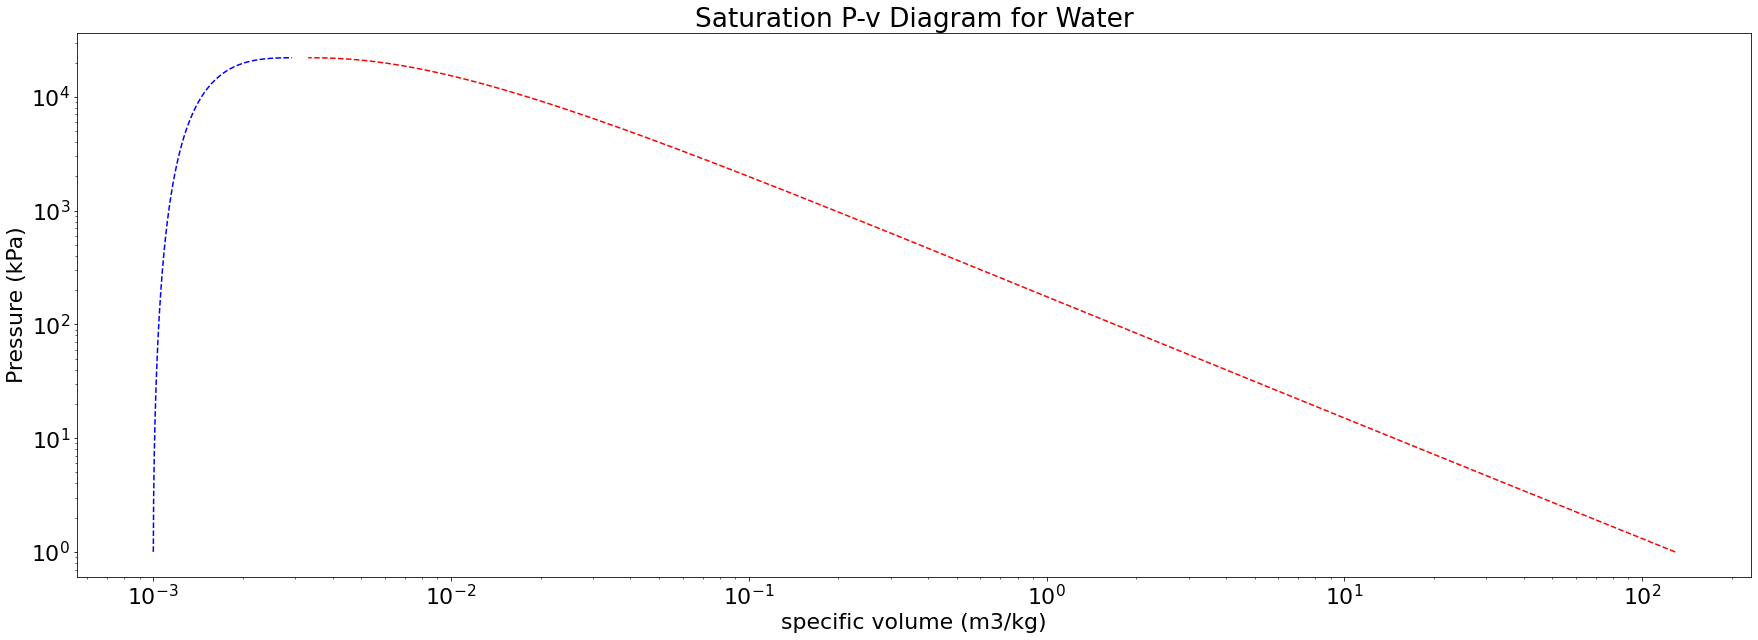

In [63]:
font = {'family' : 'Helvetica',
        'size'   : 22}
plt.figure(figsize=(30,10))
plt.xscale("log")
plt.yscale("log")
plt.title('Saturation P-v Diagram for Water')
plt.rc('font', **font)
plt.plot(vf,p, 'b--')
plt.plot(vg,p,'r--')
plt.ylabel('Pressure (kPa)')
plt.xlabel('specific volume (m3/kg)')

Text(0.5, 0, 'specific volume (m3/kg)')

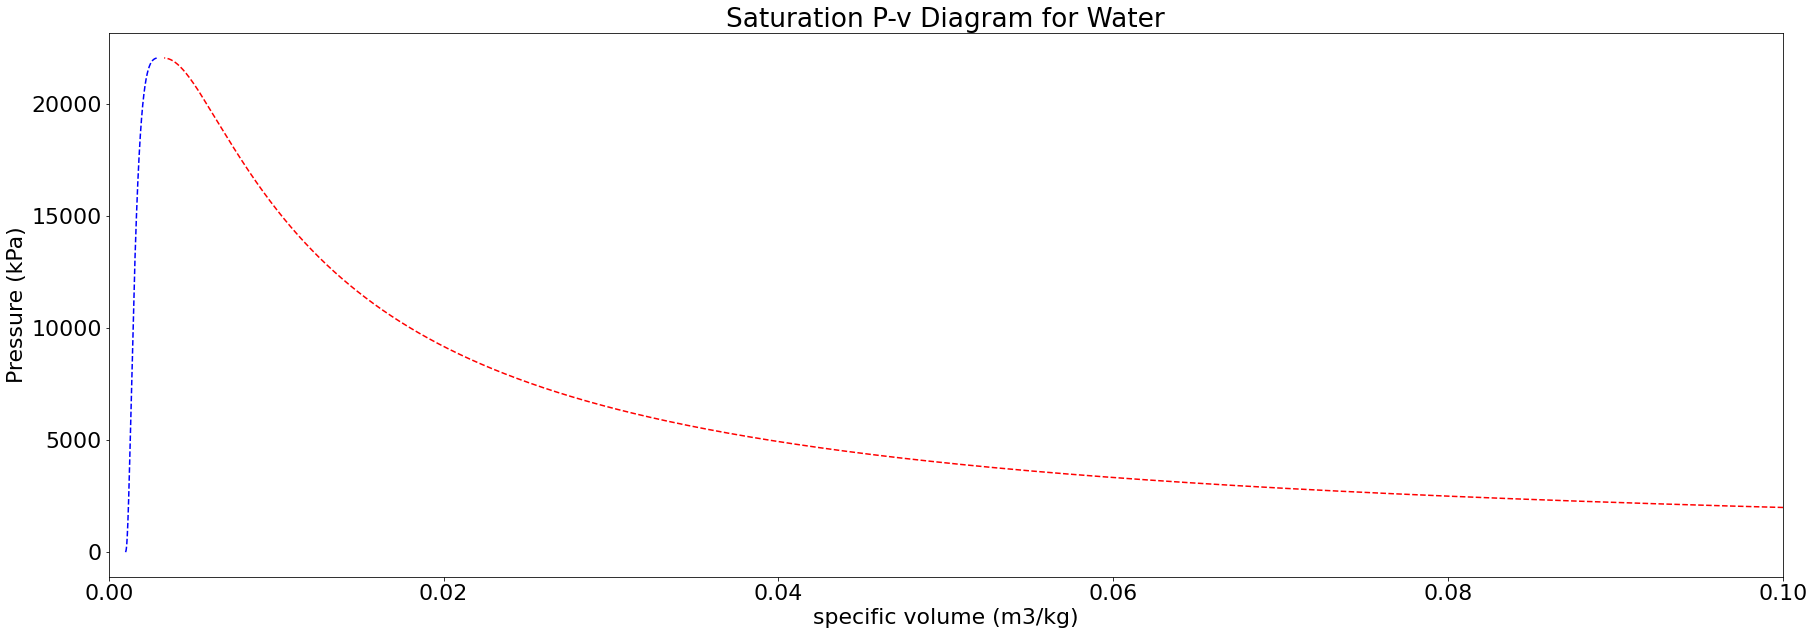

In [64]:
font = {'family' : 'Helvetica',
        'size'   : 22}
plt.figure(figsize=(30,10))
plt.title('Saturation P-v Diagram for Water')
plt.rc('font', **font)
plt.xlim([0,0.1])
plt.plot(vf,p, 'b--')
plt.plot(vg,p,'r--')
plt.ylabel('Pressure (kPa)')
plt.xlabel('specific volume (m3/kg)')

## Saturation T-s Diagram for Water

### New range of pressures, in order to not have errors calculating derivatives.

In [ ]:
p = np.arange(1.,21960.)

### Defining saturation temperatures and entropies.

In [ ]:
T = water.Ts(p=p)
s = water.ss(p=p)

### Creating the graph.

Text(0.5, 0, 'specific enthropy (kJ/kg)')

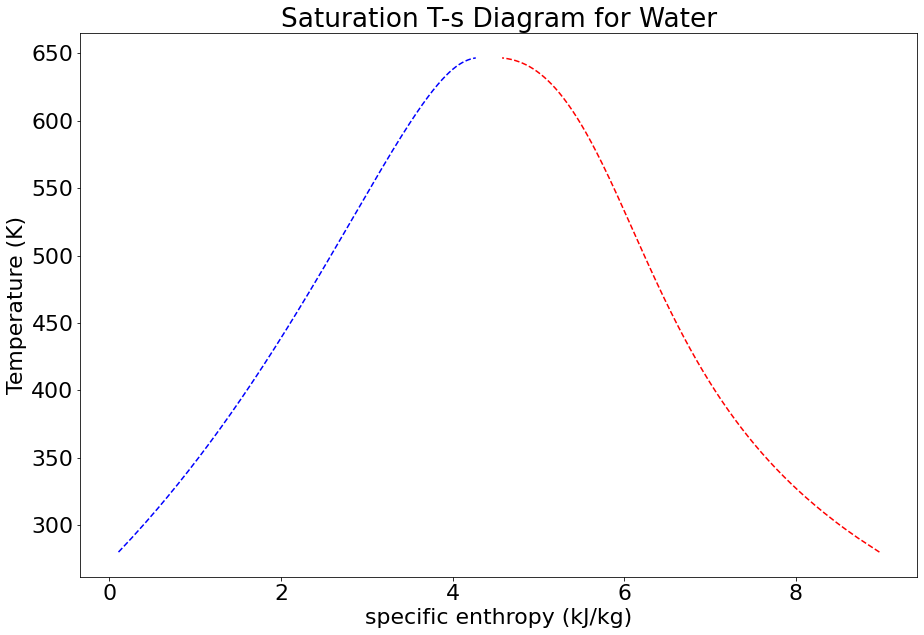

In [ ]:
font = {'family' : 'Helvetica',
        'size'   : 22}
plt.figure(figsize=(15,10))
plt.title('Saturation T-s Diagram for Water')
plt.rc('font', **font)
plt.plot(s[0],T, 'b--')
plt.plot(s[1],T,'r--')
plt.ylabel('Temperature (K)')
plt.xlabel('specific enthropy (kJ/kg)')